In [1]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imageio

In [2]:
data= np.genfromtxt("../data/challenges/1/gt/biwi/biwi_eth.txt")

In [3]:
axis = [np.min(data[:,2]), np.max(data[:,2]), np.min(data[:,3]), np.max(data[:,3])]
scale = 0.7
axis = [y-scale if y < 0 else y+scale for y in axis]

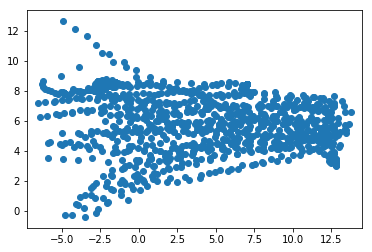

In [4]:
# Regular plot of x,y positions
plt.scatter(data[:, 2], data[:, 3])
plt.axis(axis)
plt.show()

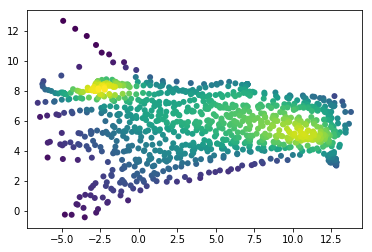

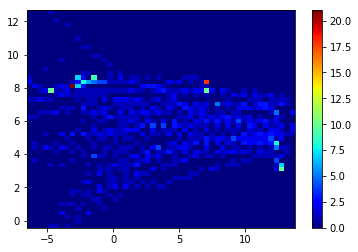

In [5]:
# Histogram of x, y positions
# Color indicates how dense it is (in the overall dataset)
from scipy.stats import gaussian_kde

x = data[:, 2]
y = data[:, 3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.scatter(x, y, c=z, edgecolor='')
plt.axis(axis)
plt.show()

# another option
plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [6]:
# Pedestrian speed histogram
# and mean speed per pedestrian
peds = np.unique(data[:, 1])
npeds = peds.shape[0]

In [7]:
speeds = np.zeros((npeds,))

In [8]:
for i in range(npeds):
    pts = data[np.where(data[:, 1] == peds[i])]
    xys = pts[:, 2:]
    vs = np.sum(np.square(xys[1:, :] - xys[:-1, :]), axis=1)
    speeds[i] = np.average(vs)

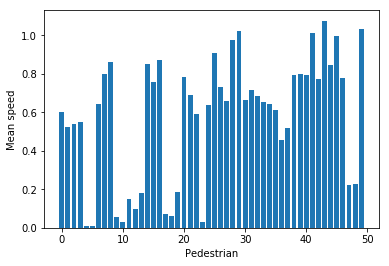

In [9]:
# Mean speed per pedestrian
plt.bar(np.arange(npeds), speeds, align='center')
plt.xlabel('Pedestrian')
#plt.xticks(np.arange(npeds), peds)
plt.ylabel('Mean speed')
plt.show()

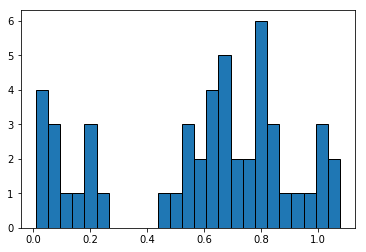

In [10]:
# Pedestrian speed histograms
plt.hist(speeds, bins=25, edgecolor='black')
plt.show()

In [11]:
# we can calculate for each pedestrian, speed at location
# so make histogram where location = location, color based on that speed
# just set z to speeds for each x,y
# plt.scatter(x, y, c=z, edgecolor='')
# plt.axis(axis)
# plt.show()

constant = -1000
npts = data.shape[0]
x = np.zeros((npts,))
y = np.zeros((npts,))
v = np.ones((npts,)) * constant

for i in range(npts):
    x[i] = data[i, 2]
    y[i] = data[i, 3]
    if i == 0 or data[i,1] != data[i-1,1]:
        continue
    v[i] = np.square(x[i] - x[i-1]) + np.square(y[i] - y[i-1])

inds = np.where(v != constant)
x = x[inds]
y = y[inds]
v = v[inds]

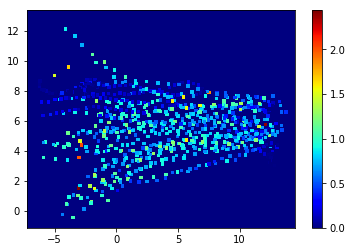

In [12]:
# Speed distributions in image space
# Color indicates how fast it is
plt.scatter(x, y, c=v, edgecolor='', cmap=plt.cm.jet, s=12, marker='s')
plt.colorbar()
plt.axis(axis)
ax = plt.gca()
ax.set_facecolor(plt.cm.jet(0.0))
plt.show()

In [13]:
# Time distributions in image space
# Color indicates frame
# Let's create an animation/gif
ns = [x for x in range(20, data.shape[0], 20)] #20 #data.shape[0] / 100

for n in ns:
    print n, "points"
    x = data[:n, 2]
    y = data[:n, 3]
    z = data[:n, 0]

    plt.scatter(x, y, c=z, edgecolor='', cmap=plt.cm.jet, s=12, marker='s')
    plt.colorbar()
    plt.axis(axis)
    ax = plt.gca()
    ax.set_facecolor('white')
    #plt.show()
    plt.savefig('./out/{}.png'.format(str(n).zfill(5)), bbox_inches='tight')
    plt.close()

20 points
40 points
60 points
80 points
100 points
120 points
140 points
160 points
180 points
200 points
220 points
240 points
260 points
280 points
300 points
320 points
340 points
360 points
380 points
400 points
420 points
440 points
460 points
480 points
500 points
520 points
540 points
560 points
580 points
600 points
620 points
640 points
660 points
680 points
700 points
720 points
740 points
760 points
780 points
800 points
820 points
840 points
860 points
880 points
900 points
920 points
940 points
960 points
980 points


In [14]:
images = []
for n in ns:
    filename = './out/{}.png'.format(str(n).zfill(5))
    images.append(imageio.imread(filename))
imageio.mimsave('./out/anim.gif', images)